### 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0, 1, size = 100)

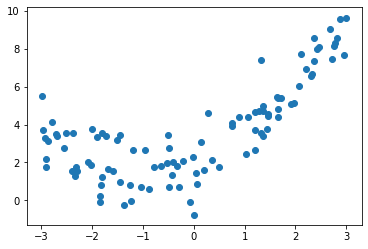

In [3]:
plt.scatter(x, y)

### 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

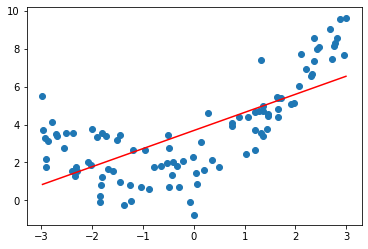

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color = 'r')

In [6]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_sacler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

In [8]:
poly2_reg = PolynomialRegression(degree = 2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_sacler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [9]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417858

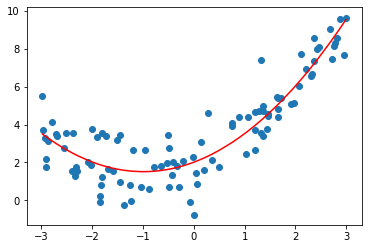

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color = 'r')

In [11]:
poly10_reg = PolynomialRegression(degree = 10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764126

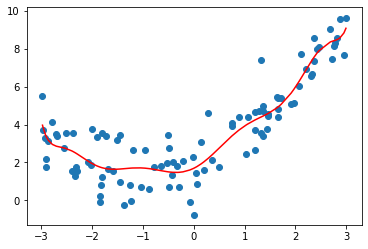

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color = 'r')

In [13]:
poly100_reg = PolynomialRegression(degree = 100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6839223451864704

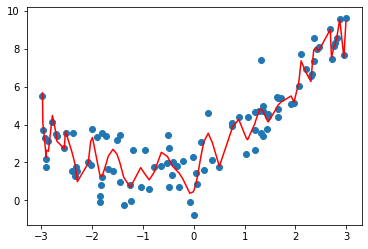

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color = 'r')

[-3, 3, -1, 10]

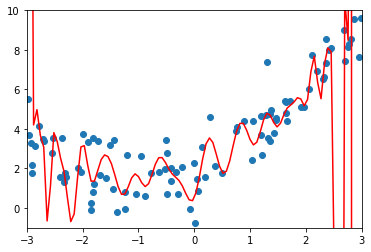

In [15]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color = 'r')
plt.axis([-3, 3, -1, 10])

In [21]:
lin_reg.coef_

array([-7.53082620e+09,  1.62554570e+01,  9.45513441e+01, -9.31815745e+02,
       -4.38317840e+03,  1.88168263e+04,  2.63888592e+04, -2.99634981e+04,
        2.89856695e+06, -4.03218450e+06, -9.32351713e+07,  7.14233572e+07,
        1.41661075e+09, -7.02762420e+08, -1.31960921e+10,  5.19154159e+09,
        8.17147342e+10, -3.13806060e+10, -3.45458510e+11,  1.48210703e+11,
        9.88332876e+11, -5.01166229e+11, -1.80686573e+12,  1.10170784e+12,
        1.73123655e+12, -1.30660324e+12,  2.20864699e+10,  1.94423239e+11,
       -1.52499981e+12,  1.22788524e+12,  1.87905457e+11, -3.84363752e+11,
        1.37850599e+12, -1.27418975e+12,  3.23500024e+11, -1.00437423e+11,
       -1.04319831e+12,  1.15621947e+12, -1.03121177e+12,  9.71337360e+11,
        8.05033146e+10, -2.63090615e+11,  9.98033574e+11, -1.20482935e+12,
        9.70815340e+11, -1.02809211e+12,  1.93702725e+11, -7.92294384e+10,
       -6.48434269e+11,  9.31356023e+11, -9.91640102e+11,  1.24874575e+12,
       -7.19046188e+11,  

### train_test_split 的意义

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [18]:
poly2_reg = PolynomialRegression(degree = 2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297902

In [19]:
poly10_reg = PolynomialRegression(degree = 10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150695

In [20]:
poly100_reg = PolynomialRegression(degree = 100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

13123135111.531496